# Plot the cross-station spectra of a high-Q glider recorded between two stations

In [73]:
# Import
from matplotlib.pyplot import subplots
from pandas import Timestamp
from numpy import geomspace, meshgrid, flip, pi

from utils_basic import get_unique_stations, power2db, time2filename
from utils_basic import ROOTDIR_GEO as rootdir
from utils_preproc import read_and_process_windowed_geo_waveforms
from utils_wavelet import extract_freq_phase_pairs, get_scales_and_freqs, get_stream_cross_station_spectra
from utils_plot import plot_cwt_cross_station_spectra, plot_freq_phase_pairs, save_figure

In [74]:
# Inputs
## Input data
starttime = "2020-01-13T20:01:01.5Z"
dur = 10.0
station1 = "A02"
station2 = "A03"

## Preprocessing
deci_factor = 2 # Decimation factor

## Wavelet transform
wavelet = "cmor"
bandwidth = 20.0
center_freq = 2.0
min_scales = 5
max_sacale = 50
num_scales = 128

## Phase-frequency-pair extraction
min_freq_pair = 40.0
max_freq_pair = 75.0

## Plotting
cohe_threshold = 0.8
power_threshold = 30.0
freq_lim_spec_plot = (30.0, 100.0)
freq_lim_pair_plot = (30.0, 100.0)

dbmin = 0.0
dbmax = 50.0

In [75]:
# Read and process the data
stream = read_and_process_windowed_geo_waveforms(starttime, dur, stations=[station1, station2], normalize=True, decimate=True, decimate_factor=deci_factor)

In [76]:
# Compute the component cross spectra
scales, freqs = get_scales_and_freqs(wavelet, center_freq, bandwidth, min_scales, max_sacale, num_scales)
specs, cross_specs = get_stream_cross_station_spectra(stream, wavelet, bandwidth, center_freq, scales)

Computing cross-spectra between stations A03 and A05...


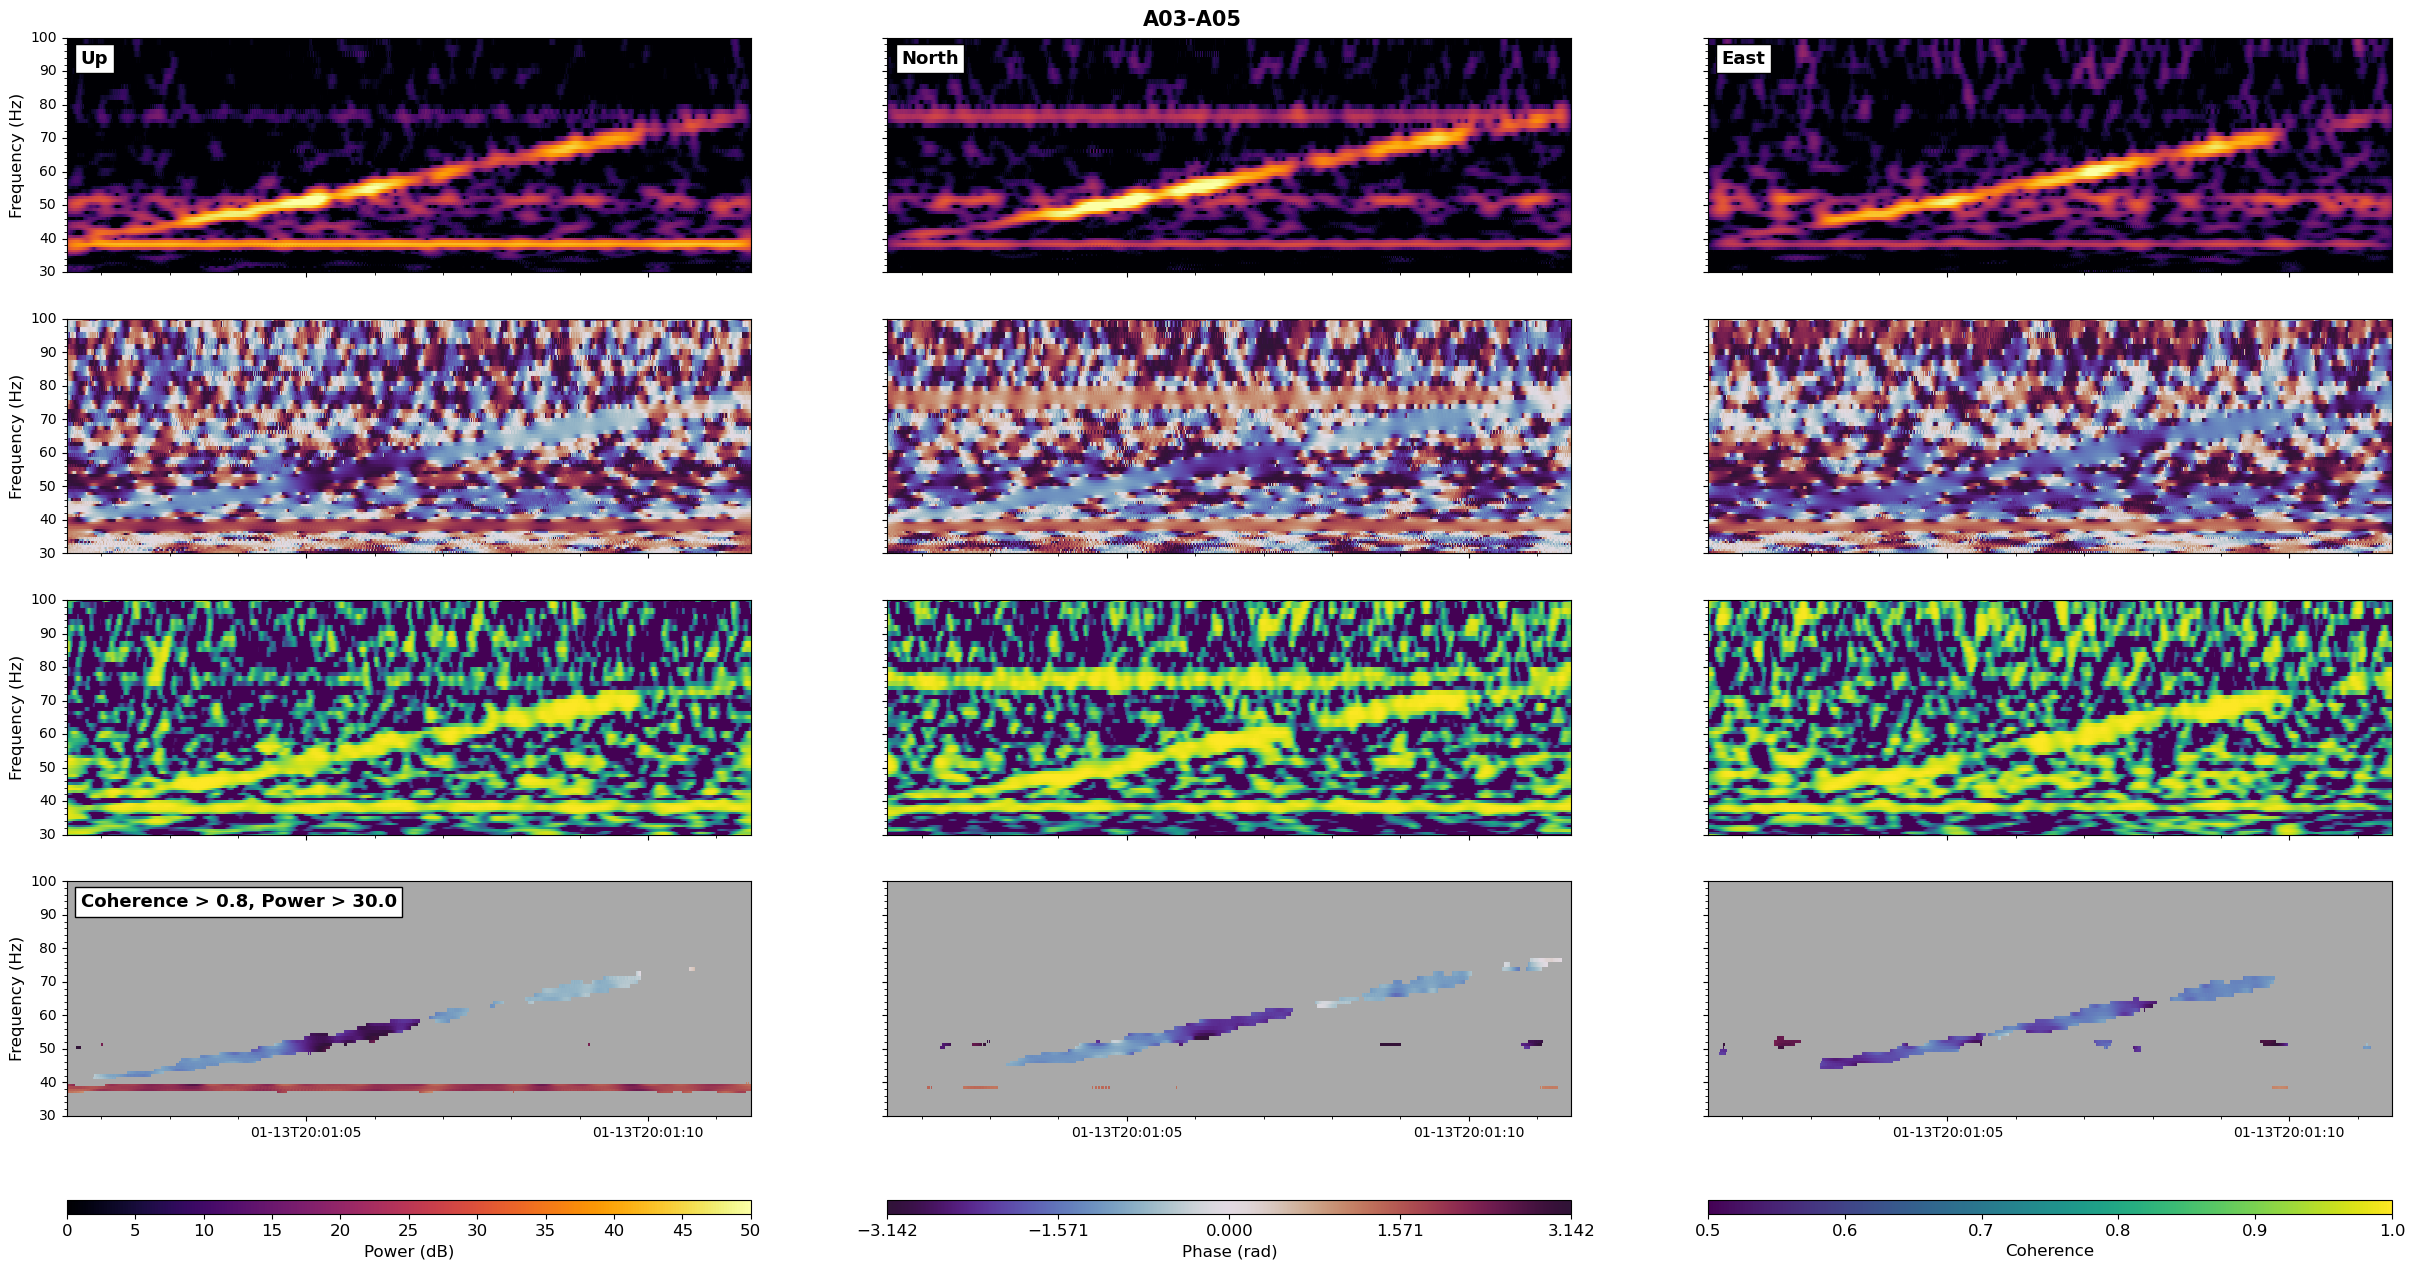

In [77]:
# Plot the cross spectra
station_pair = (station1, station2)
fig, axes, power_cbar, phase_cbar, cohe_cbar = plot_cwt_cross_station_spectra(cross_specs, station_pair, freqlim=freq_lim_spec_plot, dbmin=dbmin, dbmax=dbmax, cohe_threshold=cohe_threshold, power_threshold=power_threshold)

In [78]:
# Save the cross-spectral figure
timestr = time2filename(starttime)
if station1 > station2:
    station1, station2 = station2, station1
    
figname = f"high_q_glider_cross_station_spectra_{timestr}_{station1}_{station2}.png"
save_figure(fig, figname, outdir=rootdir)

Figure saved to /Volumes/OmanData/data/geophones/high_q_glider_cross_station_spectra_20200113T200101_A03_A05.png


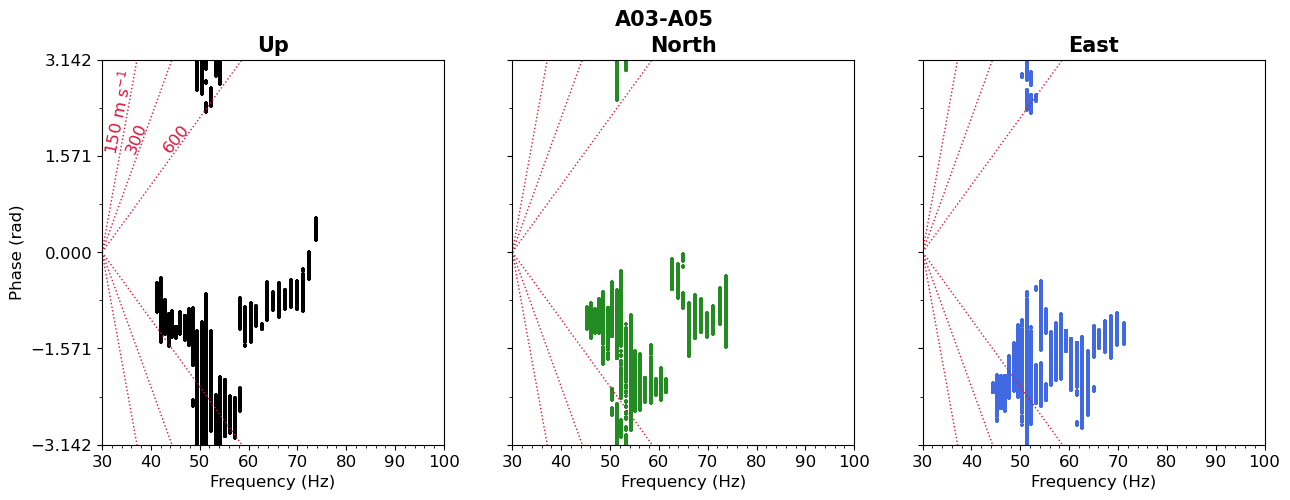

In [79]:
# Extract the frequency-phase pairs and plot them
freq_phi_dict = extract_freq_phase_pairs(cross_specs, freqmin=min_freq_pair, freqmax=max_freq_pair, power_threshold=power_threshold, cohe_threshold=cohe_threshold)

fig, axes = plot_freq_phase_pairs(freq_phi_dict, station_pair=(station1, station2), freq_lim=freq_lim_pair_plot, major_freq_spacing=10.0, minor_freq_spacing=2.0, major_phase_spacing=pi/2, minor_phase_spacing=pi/4)

In [80]:
# Save the frequency-phase pair figure
figname = f"high_q_glider_freq_phase_pairs_{timestr}_{station1}_{station2}.png"
save_figure(fig, figname, outdir=rootdir)

Figure saved to /Volumes/OmanData/data/geophones/high_q_glider_freq_phase_pairs_20200113T200101_A03_A05.png
